In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv("../data/train.csv", index_col="PassengerId")
test_data = pd.read_csv("../data/test.csv", index_col="PassengerId")

In [3]:
print(train_data.info())
print(train_data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [4]:
print(test_data.info())
print(test_data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB
None
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


### Pclass

In [5]:
print(train_data["Pclass"].unique())
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

[3 1 2]


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


### Name

In [6]:
print(train_data["Name"])

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object


In [7]:
train_data.Name[1].split()

['Braund,', 'Mr.', 'Owen', 'Harris']

In [8]:
train_data = train_data.assign(fname = train_data.Name.str.split(",").str[0])
train_data["title"] = pd.Series([i.split(",")[1].split(".")[0].strip() for i in train_data.Name], index=train_data.index)

In [9]:
test_data = test_data.assign(fname = test_data.Name.str.split(",").str[0])
test_data["title"] = pd.Series([i.split(",")[1].split(".")[0].strip() for i in test_data.Name], index=test_data.index)
train_data.drop("Name", axis=1, inplace=True)
test_data.drop("Name", axis=1, inplace=True)

In [10]:
print(test_data.fname.nunique())
print(test_data.title.nunique())

352
9


['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


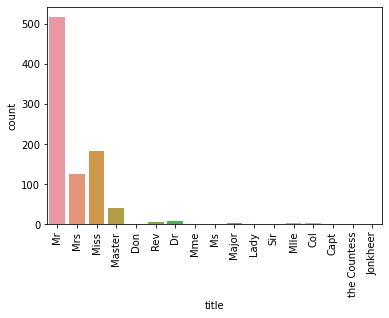

In [11]:
ts = sns.countplot(x="title",data=train_data)
ts = plt.setp(ts.get_xticklabels(), rotation=90)
print(train_data["title"].unique())
print(test_data["title"].unique())
other_titles = [title
                for title in train_data["title"]
                if title not in ["Mr", "Miss", "Mme", "Mlle", "Mrs", "Ms"]]
other_titles.append("Dona")

In [12]:
train_data["title"] = train_data['title'].replace(other_titles, 'Other')
train_data["title"] = train_data["title"].map({"Mr":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Master":2, "Other":3})
test_data["title"] = test_data['title'].replace(other_titles, 'Other')
test_data["title"] = test_data["title"].map({"Mr":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Master":2, "Other":3})

In [13]:
print(train_data.title)
print(test_data.title.isna().sum()) # No NaNs left

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    3
888    1
889    1
890    0
891    0
Name: title, Length: 891, dtype: int64
0


In [14]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(handle_unknown="ignore", sparse = False)

train_data = train_data.join(pd.DataFrame(oh.fit_transform(train_data[["fname", "title"]]), index = train_data.index))
test_data = test_data.join(pd.DataFrame(oh.transform(test_data[["fname", "title"]]), index = test_data.index))
train_data.drop("fname", axis = 1, inplace = True)
test_data.drop("fname", axis = 1, inplace = True)

### Sex

In [15]:
print(train_data["Sex"].unique())
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

['male' 'female']


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [16]:
interactions = train_data.assign(sex_class = train_data['Sex'] + "_" + train_data['Pclass'].astype("str"))
interactions[['sex_class', 'Survived']].groupby(['sex_class'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,sex_class,Survived
0,female_1,0.968085
1,female_2,0.921053
2,female_3,0.500000
3,male_1,0.368852
4,male_2,0.157407
5,male_3,0.135447


In [17]:
train_data = train_data.assign(sex_class = train_data['Sex'] + "_" + train_data['Pclass'].astype("str"))
test_data = test_data.assign(sex_class = test_data['Sex'] + "_" + test_data['Pclass'].astype("str"))

In [18]:
train_data = train_data.join(pd.get_dummies(train_data['Pclass'], prefix="Pclass"))
test_data = test_data.join(pd.get_dummies(test_data['Pclass'], prefix="Pclass"))

In [19]:
train_data["Sex"] = train_data["Sex"].map({"female":0, "male":1})
test_data["Sex"] = test_data["Sex"].map({"female":0, "male":1})

In [20]:
train_data["sex_class"] = train_data["sex_class"].map({"female_1":0, "female_2":1, "female_3":2, "male_1":4, "male_2":5, "male_3":6})
test_data["sex_class"] = test_data["sex_class"].map({"female_1":0, "female_2":1, "female_3":2, "male_1":4, "male_2":5, "male_3":6})

### Age

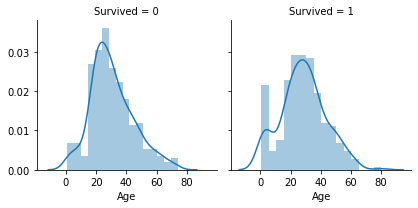

In [21]:
g = sns.FacetGrid(train_data, col='Survived')
g = g.map(sns.distplot, "Age")

In [22]:
def find_similar_passengers(id, dataset):
    subset = dataset[(dataset.title == dataset.title[id]) &
                    (dataset.Pclass == dataset.Pclass[id])]

    if subset["Age"].mean() == "NaN":
        subset = dataset[(dataset["sex_class"] == dataset.iloc[id]["sex_class"])]

    if subset["Age"].mean() == "NaN":
        subset = dataset[(dataset["sex"] == dataset.iloc[id]["sex"])]

    age = subset["Age"].mean()
    return age

In [23]:
no_ages = train_data[train_data["Age"].isna()].index
for pid in no_ages:
    train_data.Age[pid] = find_similar_passengers(pid, train_data)

no_ages_test = test_data[test_data["Age"].isna()].index
for pid2 in no_ages_test:
    test_data.Age[pid2] = find_similar_passengers(pid2, test_data)

In [24]:
train_data["age_group"] =  pd.cut(train_data["Age"], bins=[0,5,65,100], labels=[0,1,2]).astype("int64")
test_data["age_group"] = pd.cut(test_data["Age"], bins=[0,5,65,100], labels=[0,1,2]).astype("int64")

### SibSp and Parch

In [25]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [26]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [27]:
train_data["fsize"] = train_data["SibSp"] + train_data["Parch"] + 1
test_data["fsize"] = test_data["SibSp"] + test_data["Parch"] + 1

In [28]:
train_data[['fsize', 'Survived']].groupby(['fsize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,fsize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


### Ticket

In [29]:
print(train_data.Ticket.nunique())
print(train_data.Ticket.tail())

681
PassengerId
887        211536
888        112053
889    W./C. 6607
890        111369
891        370376
Name: Ticket, dtype: object


In [30]:
train_data["ticket_prefix"] = pd.Series([len(i.split()) > 1 for i in train_data.Ticket], index=train_data.index)

In [31]:
train_data[['ticket_prefix', 'Survived']].groupby(['ticket_prefix'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,ticket_prefix,Survived
1,True,0.384956
0,False,0.383459


In [32]:
train_data.drop("ticket_prefix", axis=1, inplace=True)
train_data.drop("Ticket", axis=1, inplace=True)
test_data.drop("Ticket", axis=1, inplace=True)

### Fare

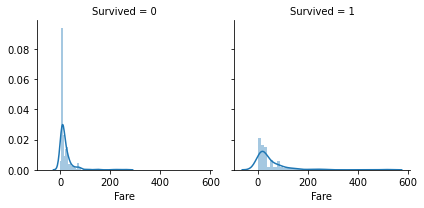

In [33]:
g = sns.FacetGrid(train_data, col='Survived')
g = g.map(sns.distplot, "Fare")

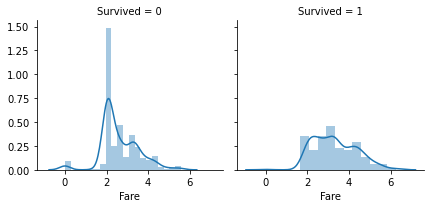

In [34]:
train_data["Fare"] = train_data["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
test_data["Fare"] = test_data["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
g = sns.FacetGrid(train_data, col='Survived')
g = g.map(sns.distplot, "Fare")

### Cabin

In [35]:
train_data.drop("Cabin", axis=1, inplace=True)
test_data.drop("Cabin", axis=1, inplace=True)

### Embarked

In [36]:
train_data["Embarked"] = train_data["Embarked"].fillna("S")
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [37]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,0,...,666,667,668,669,sex_class,Pclass_1,Pclass_2,Pclass_3,age_group,fsize
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,1,22.00,1,0,1.981001,S,0,0.0,...,0.0,1.0,0.0,0.0,6,0,0,1,1,2
2,1,1,0,38.00,1,0,4.266662,C,1,0.0,...,0.0,0.0,1.0,0.0,0,1,0,0,1,2
3,1,3,0,26.00,0,0,2.070022,S,1,0.0,...,0.0,0.0,1.0,0.0,2,0,0,1,1,1
4,1,1,0,35.00,1,0,3.972177,S,1,0.0,...,0.0,0.0,1.0,0.0,0,1,0,0,1,2
5,0,3,1,35.00,0,0,2.085672,S,0,0.0,...,0.0,1.0,0.0,0.0,6,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.00,0,0,2.564949,S,3,0.0,...,0.0,0.0,0.0,1.0,5,0,1,0,1,1
888,1,1,0,19.00,0,0,3.401197,S,1,0.0,...,0.0,0.0,1.0,0.0,0,1,0,0,1,1
889,0,3,0,21.75,1,2,3.154870,S,1,0.0,...,0.0,0.0,1.0,0.0,2,0,0,1,1,4


In [38]:
# # 그래프의 비율에 맞게 수치를 넣어줬다.
# count = 0
# for dataset in train_test_data:
#     if  4>= count >= 0 :       
#         dataset['Embarked'] = dataset['Embarked'].fillna('S')
#         count+=1
#     elif 5>= count >= 5 :
#         dataset['Embarked'] = dataset['Embarked'].fillna('Q')
#         count+=1
#     else:
#         dataset['Embarked'] = dataset['Embarked'].fillna('C')
#         count = 0    

In [39]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,0,...,666,667,668,669,sex_class,Pclass_1,Pclass_2,Pclass_3,age_group,fsize
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,1,22.00,1,0,1.981001,S,0,0.0,...,0.0,1.0,0.0,0.0,6,0,0,1,1,2
2,1,1,0,38.00,1,0,4.266662,C,1,0.0,...,0.0,0.0,1.0,0.0,0,1,0,0,1,2
3,1,3,0,26.00,0,0,2.070022,S,1,0.0,...,0.0,0.0,1.0,0.0,2,0,0,1,1,1
4,1,1,0,35.00,1,0,3.972177,S,1,0.0,...,0.0,0.0,1.0,0.0,0,1,0,0,1,2
5,0,3,1,35.00,0,0,2.085672,S,0,0.0,...,0.0,1.0,0.0,0.0,6,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.00,0,0,2.564949,S,3,0.0,...,0.0,0.0,0.0,1.0,5,0,1,0,1,1
888,1,1,0,19.00,0,0,3.401197,S,1,0.0,...,0.0,0.0,1.0,0.0,0,1,0,0,1,1
889,0,3,0,21.75,1,2,3.154870,S,1,0.0,...,0.0,0.0,1.0,0.0,2,0,0,1,1,4


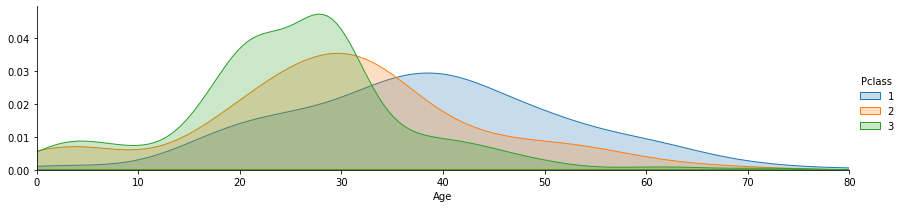

In [40]:
facet = sns.FacetGrid(train_data, hue="Pclass",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()

plt.show()

In [41]:
# train_data.loc[ train_data['Age'] <= 16, 'Age'] = 0
# train_data.loc[(train_data['Age'] > 16) & (train_data['Age'] <= 32), 'Age'] = 1
# train_data.loc[(train_data['Age'] > 32) & (train_data['Age'] <= 45), 'Age'] = 2
# train_data.loc[(train_data['Age'] > 45) & (train_data['Age'] <= 59), 'Age'] = 3
# train_data.loc[ train_data['Age'] > 59, 'Age'] = 4

In [42]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,0,...,666,667,668,669,sex_class,Pclass_1,Pclass_2,Pclass_3,age_group,fsize
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,1,22.00,1,0,1.981001,S,0,0.0,...,0.0,1.0,0.0,0.0,6,0,0,1,1,2
2,1,1,0,38.00,1,0,4.266662,C,1,0.0,...,0.0,0.0,1.0,0.0,0,1,0,0,1,2
3,1,3,0,26.00,0,0,2.070022,S,1,0.0,...,0.0,0.0,1.0,0.0,2,0,0,1,1,1
4,1,1,0,35.00,1,0,3.972177,S,1,0.0,...,0.0,0.0,1.0,0.0,0,1,0,0,1,2
5,0,3,1,35.00,0,0,2.085672,S,0,0.0,...,0.0,1.0,0.0,0.0,6,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.00,0,0,2.564949,S,3,0.0,...,0.0,0.0,0.0,1.0,5,0,1,0,1,1
888,1,1,0,19.00,0,0,3.401197,S,1,0.0,...,0.0,0.0,1.0,0.0,0,1,0,0,1,1
889,0,3,0,21.75,1,2,3.154870,S,1,0.0,...,0.0,0.0,1.0,0.0,2,0,0,1,1,4


In [43]:
train_data["Embarked"] = train_data["Embarked"].fillna("S")
print(train_data.Embarked.isna().sum())

0


In [44]:
train_data = train_data.join(pd.get_dummies(train_data['Embarked'], prefix="Embarked_"))
test_data = test_data.join(pd.get_dummies(test_data['Embarked'], prefix="Embarked_"))
#train_data["Embarked"] = train_data["Embarked"].map({"S":0, "Q":1, "C":2})
#test_data["Embarked"] = test_data["Embarked"].map({"S":0, "Q":1, "C":2})

In [45]:
train_data.drop("Embarked", axis=1, inplace=True)
test_data.drop("Embarked", axis=1, inplace=True)

In [46]:
train_data['Age']

PassengerId
1      22.00
2      38.00
3      26.00
4      35.00
5      35.00
       ...  
887    27.00
888    19.00
889    21.75
890    26.00
891    32.00
Name: Age, Length: 891, dtype: float64

# Modelling

In [47]:
ss = StandardScaler()

train_y = train_data["Survived"]
train_data.drop("Survived", axis=1, inplace=True)

scoring_method = "f1"

train_scaled = ss.fit_transform(train_data)
test_scaled = ss.transform(test_data)

#### [1] Logistic REgression

In [48]:
print(train_data.isna().sum())
print(test_data.isna().sum())

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
              ..
age_group      0
fsize          0
Embarked__C    0
Embarked__Q    0
Embarked__S    0
Length: 686, dtype: int64
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
              ..
age_group      0
fsize          0
Embarked__C    0
Embarked__Q    0
Embarked__S    0
Length: 686, dtype: int64


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
model = LogisticRegression(random_state=10, max_iter = 1000)
logit_params = {
    "C": [1, 23, 24, 25, 26, 30],
    "solver": ["lbfgs", "liblinear"]
    
}
logit_gs = GridSearchCV(model, logit_params, scoring="f1", cv = 5, n_jobs=4)

In [50]:
logit_gs.fit(train_data, train_y)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=10),
             n_jobs=4,
             param_grid={'C': [1, 23, 24, 25, 26, 30],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='f1')

In [51]:
print(logit_gs.best_params_)
print(logit_gs.best_score_)

{'C': 25, 'solver': 'liblinear'}
0.7771182392267246


#### [2] Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

rf_params ={
    'bootstrap': [True, False],
    'max_depth': [10, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [1, 2, 3, 4, 5],
    'n_estimators': [5, 10, 15, 23, 24, 25]}

rf_gs = GridSearchCV(rf_model, rf_params, scoring=scoring_method, cv=8, n_jobs=4)

In [53]:
rf_gs.fit(train_data, train_y)

GridSearchCV(cv=8, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [5, 10, 15, 23, 24, 25]},
             scoring='f1')

In [54]:
print(rf_gs.best_params_)
print(rf_gs.best_score_)

{'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 23}
0.7726151243215129


#### [3] SVM

In [55]:
from sklearn.svm import SVC
svc_model = SVC()

test_parameters = {
    "C": [1, 10, 14, 15, 16],
    "kernel": ["linear", "poly", "rbf" , "sigmoid"],
}
svc_gs = GridSearchCV(svc_model, test_parameters, scoring="f1", cv=5, n_jobs=4)

In [56]:
svc_gs.fit(train_scaled, train_y)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=4,
             param_grid={'C': [1, 10, 14, 15, 16],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1')

In [57]:
print(svc_gs.best_params_)
print(svc_gs.best_score_)

{'C': 15, 'kernel': 'sigmoid'}
0.7779905775855631


#### [4] Light Gradient Boosting

In [58]:
from lightgbm import LGBMClassifier
lgb_model = LGBMClassifier()
test_parameters = {
    "n_estimators": [int(x) for x in np.linspace(5, 30, 6)],
    "reg_alpha": [0, 1.25, 1.5, 2],
    "learning_rate": [0.5, 0.4, 0.35, 0.3, 0.25, 0.2],
    "subsample": [0.5, 0.75, 1]
}
lgb_gs = GridSearchCV(lgb_model, test_parameters, scoring=scoring_method, cv=8, n_jobs=4)

In [59]:
lgb_gs.fit(train_data, train_y)

GridSearchCV(cv=8, estimator=LGBMClassifier(), n_jobs=4,
             param_grid={'learning_rate': [0.5, 0.4, 0.35, 0.3, 0.25, 0.2],
                         'n_estimators': [5, 10, 15, 20, 25, 30],
                         'reg_alpha': [0, 1.25, 1.5, 2],
                         'subsample': [0.5, 0.75, 1]},
             scoring='f1')

In [60]:
print(lgb_gs.best_params_)
print(lgb_gs.best_score_)

{'learning_rate': 0.25, 'n_estimators': 30, 'reg_alpha': 1.25, 'subsample': 0.5}
0.7885511230707807


### Comparing models

#### Ensembling/Voting

In [61]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[
    ("logit", logit_gs.best_estimator_),
    ("rf", rf_gs.best_estimator_),
    ("svc", svc_gs.best_estimator_),
    ("lgb", lgb_gs.best_estimator_),
], voting = "hard")

In [62]:
ensemble_model.fit(train_data, train_y)

VotingClassifier(estimators=[('logit',
                              LogisticRegression(C=25, max_iter=1000,
                                                 random_state=10,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     n_estimators=23)),
                             ('svc', SVC(C=15, kernel='sigmoid')),
                             ('lgb',
                              LGBMClassifier(learning_rate=0.25,
                                             n_estimators=30, reg_alpha=1.25,
                                             subsample=0.5))])

In [63]:
ensemble_model.score(train_data, train_y)

0.9506172839506173

In [64]:
preds = ensemble_model.predict(test_data)

In [65]:
output = pd.DataFrame({'PassengerId': test_data.index,
                       'Survived': preds})

output.to_csv('5submission.csv', index=False)